In [2]:
import pandas as pd

slb = pd.read_csv('slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [3]:
slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [4]:
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

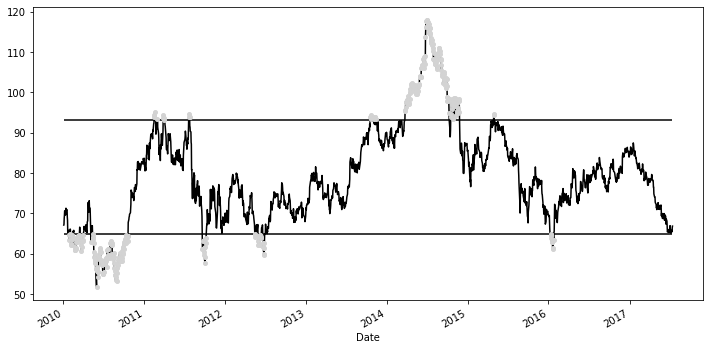

In [7]:
import matplotlib.pyplot as plt


slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='black')

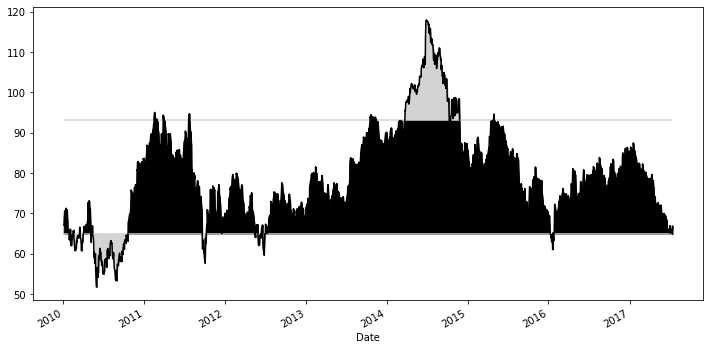

In [8]:
slb_close.plot(color='black', figsize=(12,6))
plt.hlines(y=[lower_10, upper_10], 
           xmin=xmin, xmax=xmax,color='lightgray')
plt.fill_between(x=criteria.index, y1=lower_10,
                 y2=slb_close.values, color='black')
plt.fill_between(x=criteria.index,y1=lower_10,
                 y2=slb_close.values, where=slb_close < lower_10,
                 color='lightgray')
plt.fill_between(x=criteria.index, y1=upper_10, 
                 y2=slb_close.values, where=slb_close > upper_10,
                 color='lightgray')